In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:

# 한글폰트 설정 2
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='./resources/fonts/NotoSansKR-Regular.otf').get_name()
rc('font',family=font_name)
# 한글폰트 설정 1
plt.rcParams['font.family'] = 'Noto Sans KR'

In [206]:
df_move = pd.read_csv('./data/지역별순이동-통합2012-2022.csv')
df_move

,Year,Region,순이동률,전입률,전출률
0,2012,Gangwon-do,0.0,14.8,14.8
1,2012,Gyeonggi-do,0.7,16.3,15.6
2,2012,Gyeongsangnam-do,-0.1,12.6,12.7
3,2012,Gyeongsangbuk-do,-0.2,12.5,12.7
4,2012,Gwangju,-0.1,15.7,15.8
...,...,...,...,...,...
193,2022,Jeollanam-do,0.0,10.5,10.6
194,2022,NaN,-0.3,11.3,11.5
195,2022,Jeju,0.5,12.9,12.4
196,2022,Chungcheongnam-do,0.7,12.3,11.6


In [207]:
df_demographic = pd.read_csv('./data/한국인구통계2002-2022수정본.csv')
df_demographic

,Year,Region,Birth_rate,Death_rate,Divorce_rate,Marriage_rate,Natural_growth_rate,Is_Capital,Is_bigcity
0,2000,Busan,11.61,5.8,2.5,7.5,5.8,False,True
1,2000,Chungcheongbuk-do,15.06,7.3,1.7,6.6,7.7,False,False
2,2000,Chungcheongnam-do,14.75,9.0,2.0,6.5,5.7,False,False
3,2000,Daegu,14.39,5.3,2.0,7.4,9.1,False,True
4,2000,Daejeon,16.08,4.9,2.4,7.5,11.2,False,True
...,...,...,...,...,...,...,...,...,...
4711,2022,Jeollanam-do,8.84,9.1,2.0,3.2,-5.4,False,False
4712,2022,Sejong,7.90,3.4,1.4,3.9,4.5,False,False
4713,2022,Seoul,8.84,4.7,1.4,3.4,-0.6,True,True
4714,2022,Ulsan,4.80,4.7,1.7,3.5,0.1,False,True


# 가설 4: 수도권으로의 인구 유입이 지방 인구 감소를 가속화한다.

In [208]:
# 인구통계데이터 2012년부터 조회
df_demographic2012_2022 = df_demographic[df_demographic['Year'] >=2012]
df_demographic2012_2022

,Year,Region,Birth_rate,Death_rate,Divorce_rate,Marriage_rate,Natural_growth_rate,Is_Capital,Is_bigcity
2448,2012,Busan,8.60,6.5,2.0,6.7,2.1,False,True
2449,2012,Chungcheongbuk-do,10.70,7.3,1.9,6.3,3.4,False,False
2450,2012,Chungcheongnam-do,11.07,6.9,2.1,6.5,4.2,False,False
2451,2012,Daegu,9.13,5.1,1.8,6.7,4.0,False,True
2452,2012,Daejeon,11.09,5.2,2.0,7.0,5.8,False,True
...,...,...,...,...,...,...,...,...,...
4711,2022,Jeollanam-do,8.84,9.1,2.0,3.2,-5.4,False,False
4712,2022,Sejong,7.90,3.4,1.4,3.9,4.5,False,False
4713,2022,Seoul,8.84,4.7,1.4,3.4,-0.6,True,True
4714,2022,Ulsan,4.80,4.7,1.7,3.5,0.1,False,True


In [209]:
# 데이터 병합
df = pd.merge(df_demographic2012_2022,df_move,how='outer',on=['Year','Region'])
df

,Year,Region,Birth_rate,Death_rate,Divorce_rate,Marriage_rate,Natural_growth_rate,Is_Capital,Is_bigcity,순이동률,전입률,전출률
0,2012,Busan,8.60,6.5,2.0,6.7,2.1,False,True,-0.6,13.2,13.7
1,2012,Busan,8.81,6.9,2.3,5.7,1.9,False,True,-0.6,13.2,13.7
2,2012,Busan,8.77,6.2,2.2,5.4,2.6,False,True,-0.6,13.2,13.7
3,2012,Busan,8.25,5.7,2.0,6.1,2.6,False,True,-0.6,13.2,13.7
4,2012,Busan,7.75,5.7,2.0,5.9,2.0,False,True,-0.6,13.2,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2274,2022,Whole country,5.30,10.2,1.8,3.5,-4.9,False,False,0.0,12.0,12.0
2275,2022,Whole country,5.00,8.7,1.7,3.7,-3.7,False,False,0.0,12.0,12.0
2276,2022,Whole country,4.60,6.6,1.9,3.9,-2.0,False,False,0.0,12.0,12.0
2277,2022,Whole country,4.50,5.9,1.8,3.5,-1.4,False,False,0.0,12.0,12.0


In [210]:
df.to_csv('./data/지역별순이동2-통합2012-2022.csv')

In [211]:
# 결측치 확인
missing_val = df.isna().sum()
missing_val

Year                     0
Region                  11
Birth_rate              11
Death_rate              11
Divorce_rate            11
Marriage_rate           11
Natural_growth_rate     11
Is_Capital              11
Is_bigcity              11
순이동률                   126
전입률                    126
전출률                    126
dtype: int64

<Figure size 1000x600 with 0 Axes>

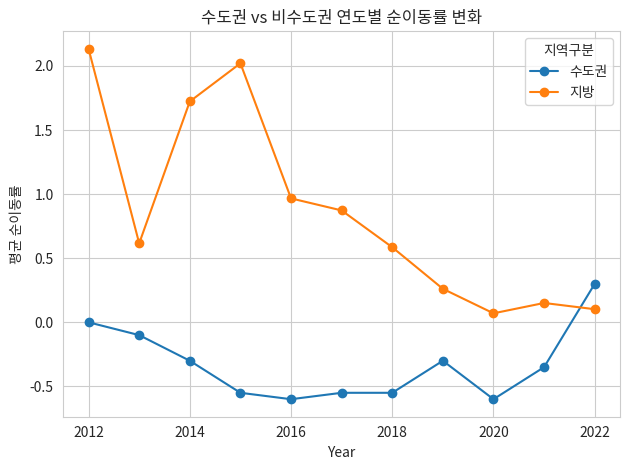

In [212]:
# 수도권 지역 리스트
capital_regions = ['Seoul', 'Gyeonggi', 'Incheon']

# '수도권' 컬럼 생성
df['Region_group'] = df['Region'].apply(lambda x: '수도권' if x in capital_regions else '지방')

# 연도별, 수도권/비수도권별 순이동률 평균 계산
pivot = df.groupby(['Year', 'Region_group'])['순이동률'].mean().reset_index()

# 피벗테이블로 변환 (그래프 그리기 편하게)
pivot_table = pivot.pivot(index='Year', columns='Region_group', values='순이동률')

# 그래프 그리기
plt.figure(figsize=(10,6))
pivot_table.plot(marker='o')
plt.title('수도권 vs 비수도권 연도별 순이동률 변화')
plt.ylabel('평균 순이동률')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='지역구분')
plt.tight_layout()
plt.show()


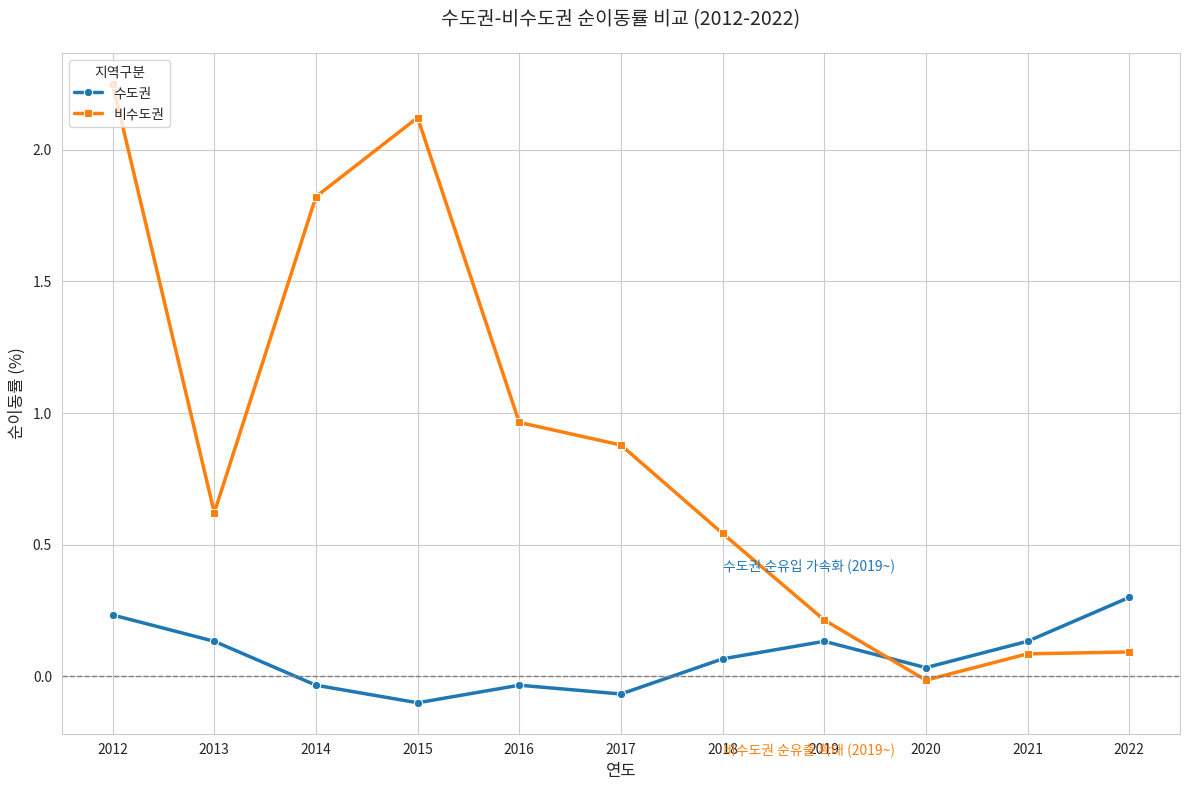

In [213]:
# 1. 데이터 전처리
df_clean = df.dropna(subset=['Is_Capital'])  # 결측치 제거
capital_data = df_clean[df_clean['Is_Capital'] == True]
non_capital_data = df_clean[df_clean['Is_Capital'] == False]

# 2. 연도별 평균 계산
capital_avg = capital_data.groupby('Year')['순이동률'].mean().reset_index()
non_capital_avg = non_capital_data.groupby('Year')['순이동률'].mean().reset_index()

# 3. 시각화
plt.figure(figsize=(12, 8))

# 수도권 추세선
sns.lineplot(data=capital_avg, x='Year', y='순이동률', 
             marker='o', color='#1f77b4', linewidth=2.5,
             label='수도권')

# 비수도권 추세선
sns.lineplot(data=non_capital_avg, x='Year', y='순이동률',
             marker='s', color='#ff7f0e', linewidth=2.5,
             label='비수도권')

# 4. 그래프 설정
plt.title('수도권-비수도권 순이동률 비교 (2012-2022)', fontsize=14, pad=20)
plt.xlabel('연도', fontsize=12)
plt.ylabel('순이동률 (%)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(range(2012, 2023))
plt.legend(title='지역구분', loc='upper left')

# 5. 추세 분석 주석
plt.text(2018, 0.4, '수도권 순유입 가속화 (2019~)', 
         ha='left', color='#1f77b4', fontsize=10)
plt.text(2018, -0.3, '비수도권 순유출 확대 (2019~)', 
         ha='left', color='#ff7f0e', fontsize=10)


plt.tight_layout()
plt.savefig("./FlaskWeb/static/img/graph/수도권-비수도권 순이동률 비교 (2012-2022).png", dpi=300)  # 해상도 300 DPI로 저장
plt.show()

